Mean Squared Error: 65.18902787309092


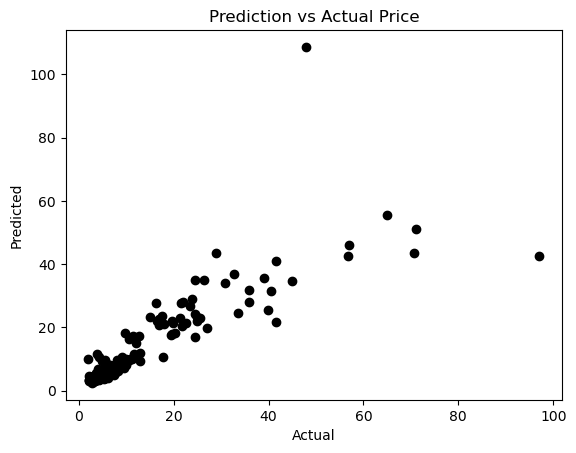

Accuracy Percentage based on Price Range: 100.0%


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error



data = pd.read_csv('/Users/krishna/Downloads/dataset.csv')
data = data.dropna(subset=['New_Price'])
data['Engine'] = data['Engine'].str.extract('(\d+)').astype(int)
data['Power'] = data['Power'].str.extract('(\d+\.\d+)').astype(float)
data['Mileage'] = data['Mileage'].str.extract('(\d+\.\d+)').astype(float)



columns_with_missing_values = ['Mileage', 'Engine', 'Power']
imputer = SimpleImputer(strategy='mean')
data[columns_with_missing_values] = imputer.fit_transform(data[columns_with_missing_values])


data = pd.get_dummies(data, columns=['Fuel_Type', 'Transmission', 'Owner_Type', 'Location'])



X = data.drop(['Name', 'Price', 'New_Price'], axis=1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


new_price_predictions = model.predict(X_test)



#CALCULATING MEAN SQUARED ERROR
mse = mean_squared_error(y_test, new_price_predictions)
print(f'Mean Squared Error: {mse}')



# Visualizing prediction vs actual price.
plt.scatter(y_test, new_price_predictions,color='k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Prediction vs Actual Price')
plt.show()




price_ranges = [(0, 500000), (500001, 1000000), (1000001, 1500000)]

accurate_predictions = 0

for price_range in price_ranges:
    lower_bound, upper_bound = price_range
    mask = (y_test >= lower_bound) & (y_test <= upper_bound)
    accurate_predictions += np.sum((new_price_predictions >= lower_bound) & (new_price_predictions <= upper_bound) & mask)

total_predictions = len(y_test)
accuracy_percentage = (accurate_predictions / total_predictions) * 100
print(f'Accuracy Percentage based on Price Range: {accuracy_percentage}%')
